# <center> Program to analyze and find salary of a job profile</center>
### <center>by Sushant Deshpande</center>

I wrote this program so that it can scrape and analyze several jobs listed on Indeed.com or Indeed.ca in this case since I am in Canada and find the average salary of jobs. In addition to this, it also tells us which city in Canada has the maximum number of jobs and maximum salary. I have plotted all this using bar graph to make it visually easy to understand.

 Let's start by asking the user which job title he wants search for. First, we create a variable called <b> *job_title_1*</b> and store the user input in it

In [1]:
#job_title_1 = input("Enter the Job Title: ")
job_title_1 = "Data Engineer"

#### Now let's import the required libries

In [2]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
print('Libraries imported.')

Libraries imported.


The way Indeed works is it takes the given user input, converts it to lower case and replaces the spaces with +. So we need to do the same.

Let's convert the job title to lower case using <b>.lower()</b> method.

Then, let's replace the spaces with + using <b>.repalce()</b> method.

And then let's see how the output looks, <b>job_title_3</b> in this case.

In [3]:
job_title_2 = job_title_1.lower() # convert to lower case
job_title_3 = job_title_2.replace(' ', '+') # replace space with +
job_title_3

'data+engineer'

In our case, since we are searching for <b>Data Scientist</b> the output looks good, <b>*data+scientist*</b>

Now let's write the code that can scrape Indeed.ca with our <b>*job_title_3*</b>

Here we insert job_title_3 into our url using concatenate feature in python

In [4]:
from datetime import date
today = date.today()

In [5]:
# Textual month, day and year
d2 = today.strftime("%d-%B-%Y")
d2

'04-March-2021'

In [6]:
job_title_lower = job_title_1.lower() # convert to lower case
job_title_us = job_title_2.replace(' ', '_') # replace space with +
job_title_us

'data_engineer'

In [7]:
url = 'https://www.indeed.ca/jobs?q='+job_title_3+'&l=canada'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
#print(soup.prettify())

Let's check the url that we just parsed, just to be sure.

In [8]:
url

'https://www.indeed.ca/jobs?q=data+engineer&l=canada'

Now that we have the the url, let's write a function that will parse the url, extract the data and store it in a dataframe.

In order to get a proper data set, we need to parse more than one page. So let's write the code to parse first 10 pages and store them in the same dataframe using <b>pd.concat</b> function.

In [9]:
def parse(url):
    time.sleep(10)
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary"])
    for each in soup.find_all(class_= "result" ):
        time.sleep(10)
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text.replace('\n', '')
        except:
            salary = 'None'
        #synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary}, ignore_index=True)
    return df
df1 = parse(url)
url_1 = url + "&start=20"
url_2 = url + "&start=40"
url_3 = url + "&start=60"
url_4 = url + "&start=80"
url_5 = url + "&start=100"
url_6 = url + "&start=120"
url_7 = url + "&start=140"
url_8 = url + "&start=160"
url_9 = url + "&start=180"
url_10 = url + "&start=200"

df2 = parse(url_1)
time.sleep(10)
df3 = parse(url_2)
time.sleep(10)
df4 = parse(url_3)
time.sleep(10)
df5 = parse(url_4)
time.sleep(10)
df6 = parse(url_5)
time.sleep(10)
df7 = parse(url_6)
time.sleep(10)
df8 = parse(url_7)
time.sleep(10)
df9 = parse(url_8)
time.sleep(10)
df10 = parse(url_9)
time.sleep(10)
df11 = parse(url_10)

data1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=True)
data1.head()

,Title,Location,Company,Salary
0,Analytics Engineer,"Toronto, ON",Maple,"$75,000 - $105,000 a year"
1,Field Vibration Analyst/Engineer,"Calgary, AB",AP Dynamics,None
2,Azure Synapse Analytics (DW) Engineer,"Toronto, ON",SettleMate Consultants,"$85,000 - $100,000 a year"
3,BI Engineer (Contract),"Mississauga, ON",Compass Digital Labs,None
4,ETL/BI Test Engineer,"London, ON",Cognizant Technology Solutions,None


In [10]:
data1.shape

(160, 4)

In [11]:
data1.to_csv('data/data-raw-'+job_title_us+'-'+str(d2)+'.csv', index=False)

Once we have the dataset, we can see that it has a lot of stuff that we don't need like \n, $ etc. So let's clean up the data.

When we check the data type of data1, we can see that <b>Salary</b> is stored as an object. In addition to that, Salary is defined as per year, per month, per week and per hour. In order for our analysis to work, we need to have salary displayed as per year and the column salary itself should be either <b>*float*</b> or <b>*int*</b>.

In [12]:
data1.dtypes # here, salary is an object

Title       object
Location    object
Company     object
Salary      object
dtype: object

In [13]:
data_sal_year_temp = data1[data1['Salary'].str.contains(' a year')].reset_index(drop=True)
data_sal_year_1a = data_sal_year_temp.replace(' a year', '', regex=True) # replace 'a year'
data_sal_year_1 = data_sal_year_1a.replace('\n', '', regex=True) # replace \n
data_sal_year_2 = data_sal_year_1.replace('[\$,)]', '', regex=True) # replace $
data_sal_year_3a = data_sal_year_2['Salary'].str.split('-', expand=True)
data_sal_year_3a.iloc[:, :] = data_sal_year_3a.iloc[:, :].astype('float')
data_sal_year_3b = data_sal_year_3a.sum(axis=1).astype('float')
data_sal_year_3c = (data_sal_year_3b/2)
data_sal_year_3 = data_sal_year_3c.astype('int')
data_sal_year_5 = pd.concat([data_sal_year_2, data_sal_year_3], axis=1, sort=True)
data_sal_year_6 = data_sal_year_5.drop(['Salary'], axis=1)

This segment takes the salary per month and converts it to per year

In [14]:
data_sal_month_temp = data1[data1['Salary'].str.contains(' a month')].reset_index(drop=True)
data_sal_month_1a = data_sal_month_temp.replace(' a month', '', regex=True)
data_sal_month_1 = data_sal_month_1a.replace('\n', '', regex=True)
data_sal_month_2 = data_sal_month_1.replace('[\$,)]', '', regex=True)
data_sal_month_3a = data_sal_month_2['Salary'].str.split('-', expand=True)
data_sal_month_3a.iloc[:, :] = data_sal_month_3a.iloc[:, :].astype('float')
data_sal_month_3b = data_sal_month_3a.sum(axis=1).astype('float')
data_sal_month_3c = (data_sal_month_3b/2) * 12
data_sal_month_3 = data_sal_month_3c.astype('int')
data_sal_month_5 = pd.concat([data_sal_month_2, data_sal_month_3], axis=1, sort=True)
data_sal_month_6 = data_sal_month_5.drop(['Salary'], axis=1)

This segment takes the salary per week and converts it to per year

In [15]:
data_sal_week_temp = data1[data1['Salary'].str.contains(' a week')].reset_index(drop=True)
data_sal_week_1a = data_sal_week_temp.replace(' a week', '', regex=True)
data_sal_week_1 = data_sal_week_1a.replace('\n', '', regex=True)
data_sal_week_2 = data_sal_week_1.replace('[\$,)]', '', regex=True)
data_sal_week_3a = data_sal_week_2['Salary'].str.split('-', expand=True)
data_sal_week_3a.iloc[:, :] = data_sal_week_3a.iloc[:, :].astype('float')
data_sal_week_3b = data_sal_week_3a.sum(axis=1).astype('float')
data_sal_week_3c = (data_sal_week_3b/2) * 52
data_sal_week_3 = data_sal_week_3c.astype('int')
data_sal_week_5 = pd.concat([data_sal_week_2, data_sal_week_3], axis=1, sort=True)
data_sal_week_6 = data_sal_week_5.drop(['Salary'], axis=1)

This segment takes the salary per hour and converts it to per year

In [16]:
data_sal_hour_temp = data1[data1['Salary'].str.contains(' an hour')].reset_index(drop=True)
data_sal_hour_1a = data_sal_hour_temp.replace(' an hour', '', regex=True)
data_sal_hour_1 = data_sal_hour_1a.replace('\n', '', regex=True)
data_sal_hour_2 = data_sal_hour_1.replace('[\$,)]', '', regex=True)
data_sal_hour_3a = data_sal_hour_2['Salary'].str.split('-', expand=True)
data_sal_hour_3a.iloc[:, :] = data_sal_hour_3a.iloc[:, :].astype('float')
data_sal_hour_3b = data_sal_hour_3a.sum(axis=1).astype('float')
data_sal_hour_3c = (data_sal_hour_3b/2) * 40 * 52
data_sal_hour_3 = data_sal_hour_3c.astype('int')
data_sal_hour_5 = pd.concat([data_sal_hour_2, data_sal_hour_3], axis=1, sort=True)
data_sal_hour_6 = data_sal_hour_5.drop(['Salary'], axis=1)

Let's sort the rows that don't have any salary mentioned and save them in <b>data_sal_none_temp</b>

In [17]:
data_sal_none_temp = data1[data1['Salary'].str.contains('None')].reset_index(drop=True)
data_sal_none_temp.head()

,Title,Location,Company,Salary
0,Field Vibration Analyst/Engineer,"Calgary, AB",AP Dynamics,None
1,BI Engineer (Contract),"Mississauga, ON",Compass Digital Labs,None
2,ETL/BI Test Engineer,"London, ON",Cognizant Technology Solutions,None
3,Sr. Analytics Engineer,"Toronto, ON",ACV Auctions,None
4,"Engineering Analyst, Customer Satisfaction - Q...","Cambridge, ON",Toyota Motor Manufacturing Canada,None


Now let's bring together our newly formed dataset and save it as <b>data_sal_all</b> and rename the table header as <b>Title</b>, <b>Location</b>, <b>Company</b> and <b>Salary</b>

In [18]:
data_sal_all = pd.concat([data_sal_year_6, data_sal_month_6, data_sal_week_6, data_sal_hour_6], axis=0, sort=True)
data_sal_all.columns = ['Title', 'Location', 'Company', 'Salary']
data_sal_all.sort_values(by='Salary',ascending=True, inplace=True)
data_sal_all.head()

,Title,Location,Company,Salary
0,Analytics Engineer,Toronto ON,Maple,90000
3,Analytics Engineer,Toronto ON,Maple,90000
6,Analytics Engineer,Toronto ON,Maple,90000
8,Analytics Engineer,Toronto ON,Maple,90000
1,Azure Synapse Analytics (DW Engineer,Toronto ON,SettleMate Consultants,92500


Now, let's join the two data sets, <b>data_sal_all</b> and <b>data_sal_none_temp</b> and save them in <b>data_sal_all_1</b>

In [19]:
data_sal_all_1 = pd.concat([data_sal_all, data_sal_none_temp], axis=0, sort=True)
data_sal_all_1.head()

,Company,Location,Salary,Title
0,Maple,Toronto ON,90000,Analytics Engineer
3,Maple,Toronto ON,90000,Analytics Engineer
6,Maple,Toronto ON,90000,Analytics Engineer
8,Maple,Toronto ON,90000,Analytics Engineer
1,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer


Let's see the shape of <b>data_sal_all_1</b>

In [20]:
data_sal_all_1.shape

(160, 4)

The shape of <b>data_sal_all_1</b> is <b>(283, 5)</b> which is same as the shape of <b>data1</b>.
This proves that we successfully managed to merge the 2 datasets without missing any row.

Now let's replace <b>'None'</b> values with <b>np.nan</b> and change the data type of <b>Salary</b> to *float*

In [21]:
data5a = data_sal_all_1.replace('None',np.nan, regex=True)
data5a['Salary'].astype('float')

0      90000.0
3      90000.0
6      90000.0
8      90000.0
1      92500.0
2      92500.0
4      92500.0
5      92500.0
7      92500.0
9      92500.0
10     92500.0
11     92500.0
12     92500.0
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
        ...   
117        NaN
118        NaN
119        NaN
120        NaN
121        NaN
122        NaN
123        NaN
124        NaN
125        NaN
126        NaN
127        NaN
128        NaN
129        NaN
130        NaN
131        NaN
132        NaN
133        NaN
134        NaN
135        NaN
136        NaN
137        NaN
138        NaN
139        NaN
140        NaN
141        NaN
142        NaN
143        NaN
144        NaN
145        NaN
146        NaN
Name: Salary, Length: 160, dtype: float64

Now, let's find the mean of the the cell Sa;ary using the .mean() method

In [22]:
mean_1 = data5a['Salary'].mean()
mean_1

91730.76923076923

We can now replace the np.nan cells with the mean salary obtained in the previous step.

Let's also change the datatype to *int*

In [23]:
data5b = data5a['Salary'].replace(np.nan, mean_1)
data5ba = data5b.astype('int')

Let's concact this salary to our previous dataframe <b>data_sal_all_1</b>

In [24]:
data5c = pd.concat([data_sal_all_1, data5ba], axis=1)
data5c.reset_index()

,index,Company,Location,Salary,Title,Salary
0,0,Maple,Toronto ON,90000,Analytics Engineer,90000
1,3,Maple,Toronto ON,90000,Analytics Engineer,90000
2,6,Maple,Toronto ON,90000,Analytics Engineer,90000
3,8,Maple,Toronto ON,90000,Analytics Engineer,90000
4,1,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer,92500
5,2,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer,92500
6,4,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer,92500
7,5,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer,92500
8,7,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer,92500
9,9,SettleMate Consultants,Toronto ON,92500,Azure Synapse Analytics (DW Engineer,92500


Now we have two Salary columns in our dataframe, so we rename the old one to Salary_1 and drop it.

In [25]:
data5c.columns = ['Company', 'Location', 'Salary_1', 'Title', 'Salary']
data5d = data5c.drop(['Salary_1'], axis=1)
data5d.head()

,Company,Location,Title,Salary
0,Maple,Toronto ON,Analytics Engineer,90000
3,Maple,Toronto ON,Analytics Engineer,90000
6,Maple,Toronto ON,Analytics Engineer,90000
8,Maple,Toronto ON,Analytics Engineer,90000
1,SettleMate Consultants,Toronto ON,Azure Synapse Analytics (DW Engineer,92500


In [26]:
data5d.to_csv('data/data-'+job_title_us+'-'+str(d2)+'.csv', index=False)

Let's procede with the cleanup of our dataset. Let's drop the cells that don't have any location as it won't be useful to us in our analysis.

In [27]:
data6a = data5d.replace('None',np.nan, regex=True)
data6 = data6a[pd.notnull(data5d["Location"])]
data6 = data6.reset_index(drop=True)
data7 = data6.groupby('Location').count()
sort_data = data7.sort_values('Title',ascending=False)

In [28]:
sort_data.head(10)

,Company,Title,Salary
Location,,,
"Toronto, ON",75,75,75
Toronto ON,13,13,13
"Cambridge, ON",11,11,11
Canada,11,11,11
"Montréal, QC",11,11,11
Ontario,11,11,11
"London, ON",10,10,10
"Mississauga, ON",10,10,10
"Calgary, AB",8,8,8


As we can see above, <b>sort_data</b> has a location <b>Canada</b>. We need to drop that row. Since we made our code flexible by asking the user to input his job title, this field might not show up in other job titles. Hence we need to write the code that will check if this field is there, and if it, drop it, else procede without doing anything.

In [29]:
sort_data_canada_1 = sort_data.reset_index()
sort_data_canada_2 = sort_data_canada_1.iloc[:, 0]
sort_data_canada_3 = sort_data_canada_2.isin(['Canada'])

In [30]:
if sort_data_canada_3.any() == True:
    sort_data_1 = sort_data.drop(['Canada'], axis=0)
else:
    sort_data_1 = sort_data

In [31]:
sort_data_2 = sort_data_1.reset_index()
sort_data_2.head()

,Location,Company,Title,Salary
0,"Toronto, ON",75,75,75
1,Toronto ON,13,13,13
2,"Cambridge, ON",11,11,11
3,"Montréal, QC",11,11,11
4,Ontario,11,11,11


Now let's split the location into <b>City</b> and <b>Provience</b>

In [32]:
data1 = sort_data_2['Location'].str.split(',', expand=True)
data1.columns = ['City', 'Provience']
data1.head()

,City,Provience
0,Toronto,ON
1,Toronto ON,None
2,Cambridge,ON
3,Montréal,QC
4,Ontario,None


Now let's merge this new data with the previous data and drop the column <b>Location</b>

In [33]:
data2 = pd.concat([data1, sort_data_2], axis=1, sort=False)
data3 = data2.drop(['Location'], axis=1)
data3.head()

,City,Provience,Company,Title,Salary
0,Toronto,ON,75,75,75
1,Toronto ON,None,13,13,13
2,Cambridge,ON,11,11,11
3,Montréal,QC,11,11,11
4,Ontario,None,11,11,11


Let's see which <b>Provience</b> has the maximum number of jobs.

In [34]:
data4 = data3.groupby('Provience')['Title'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data5 = data4['Title'].str.split(',', expand=True)
data5.iloc[:, :] = data5.iloc[:, :].astype(float)
data5['Total'] = data5.sum(axis=1).astype(int)
data8 = data5.loc[:, 'Total']
data9 = data4.loc[:, 'Provience']
data10 = pd.concat([data9, data8], axis=1, sort=True)
data10

,Provience,Total
0,AB,8
1,ON,106
2,QC,11


Let's sort the dataframe by which <b>City</b> has the maximum number of jobs and arrange it in ascending order.

In [35]:
data11 = sort_data_1
data11.sort_values(by='Title', ascending=True, inplace=True)
data12 = data11.loc[:, 'Title']
data13 = data12.tail(15)
data13

Location
Calgary, AB         8
London, ON         10
Mississauga, ON    10
Cambridge, ON      11
Montréal, QC       11
Ontario            11
Toronto ON         13
Toronto, ON        75
Name: Title, dtype: int64

Now let's make sure we don't have any duplicated in our dataframe

In [36]:
data5d.drop_duplicates(keep=False,inplace=True)
data5d.head()

,Company,Location,Title,Salary


As we can see, many job titles have the same salary listed. For our last step, data visualization, we don’t need same salaries for different job titles, we just need one. So we group them by salary and then sort them in ascending order.

In [37]:
data5e = data5d.groupby('Salary')['Company'].apply(' '.join).reset_index()
data5e.sort_values(by='Salary', ascending=True, inplace=True)

In [38]:
data_sal_all_1 = data5e.loc[:,'Salary']
data_sal_all_2 = data_sal_all_1.tail(15)
data_sal_all_2

Series([], Name: Salary, dtype: int64)

Now, let's plot which city has the maximum number of jobs.

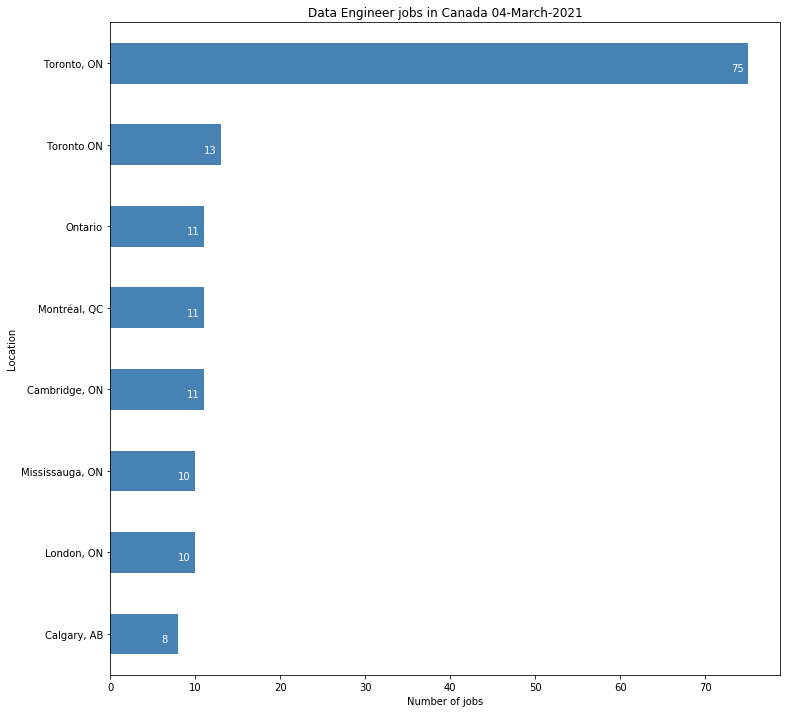

In [39]:
data13.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of jobs')
plt.title(job_title_1+' jobs in Canada '+str(d2))

for index, value in enumerate(data13): 
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 2, index - 0.10), color='white')
plt.savefig('images/'+job_title_us+'_jobs_in_Canada-'+str(d2))
plt.show()

Let's plot the salary range as well.

data_sal_all_2.plot(kind='barh', figsize=(15, 15), color='grey')
plt.xlabel('Salary')
plt.title(job_title_1+' salary in Canada '+str(d2))

for index, value in enumerate(data_sal_all_2): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value - 12000, index - 0.10), color='white')
plt.savefig('images/'+job_title_us+'_salary_in_Canada-'+str(d2))
plt.show()